<a href="https://colab.research.google.com/github/leoka90/Exploratory-Data-Analysis/blob/main/Task05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("/content/titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.value_counts()

,,,,,,,,,,,,count
PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,1
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,1
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1


In [5]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


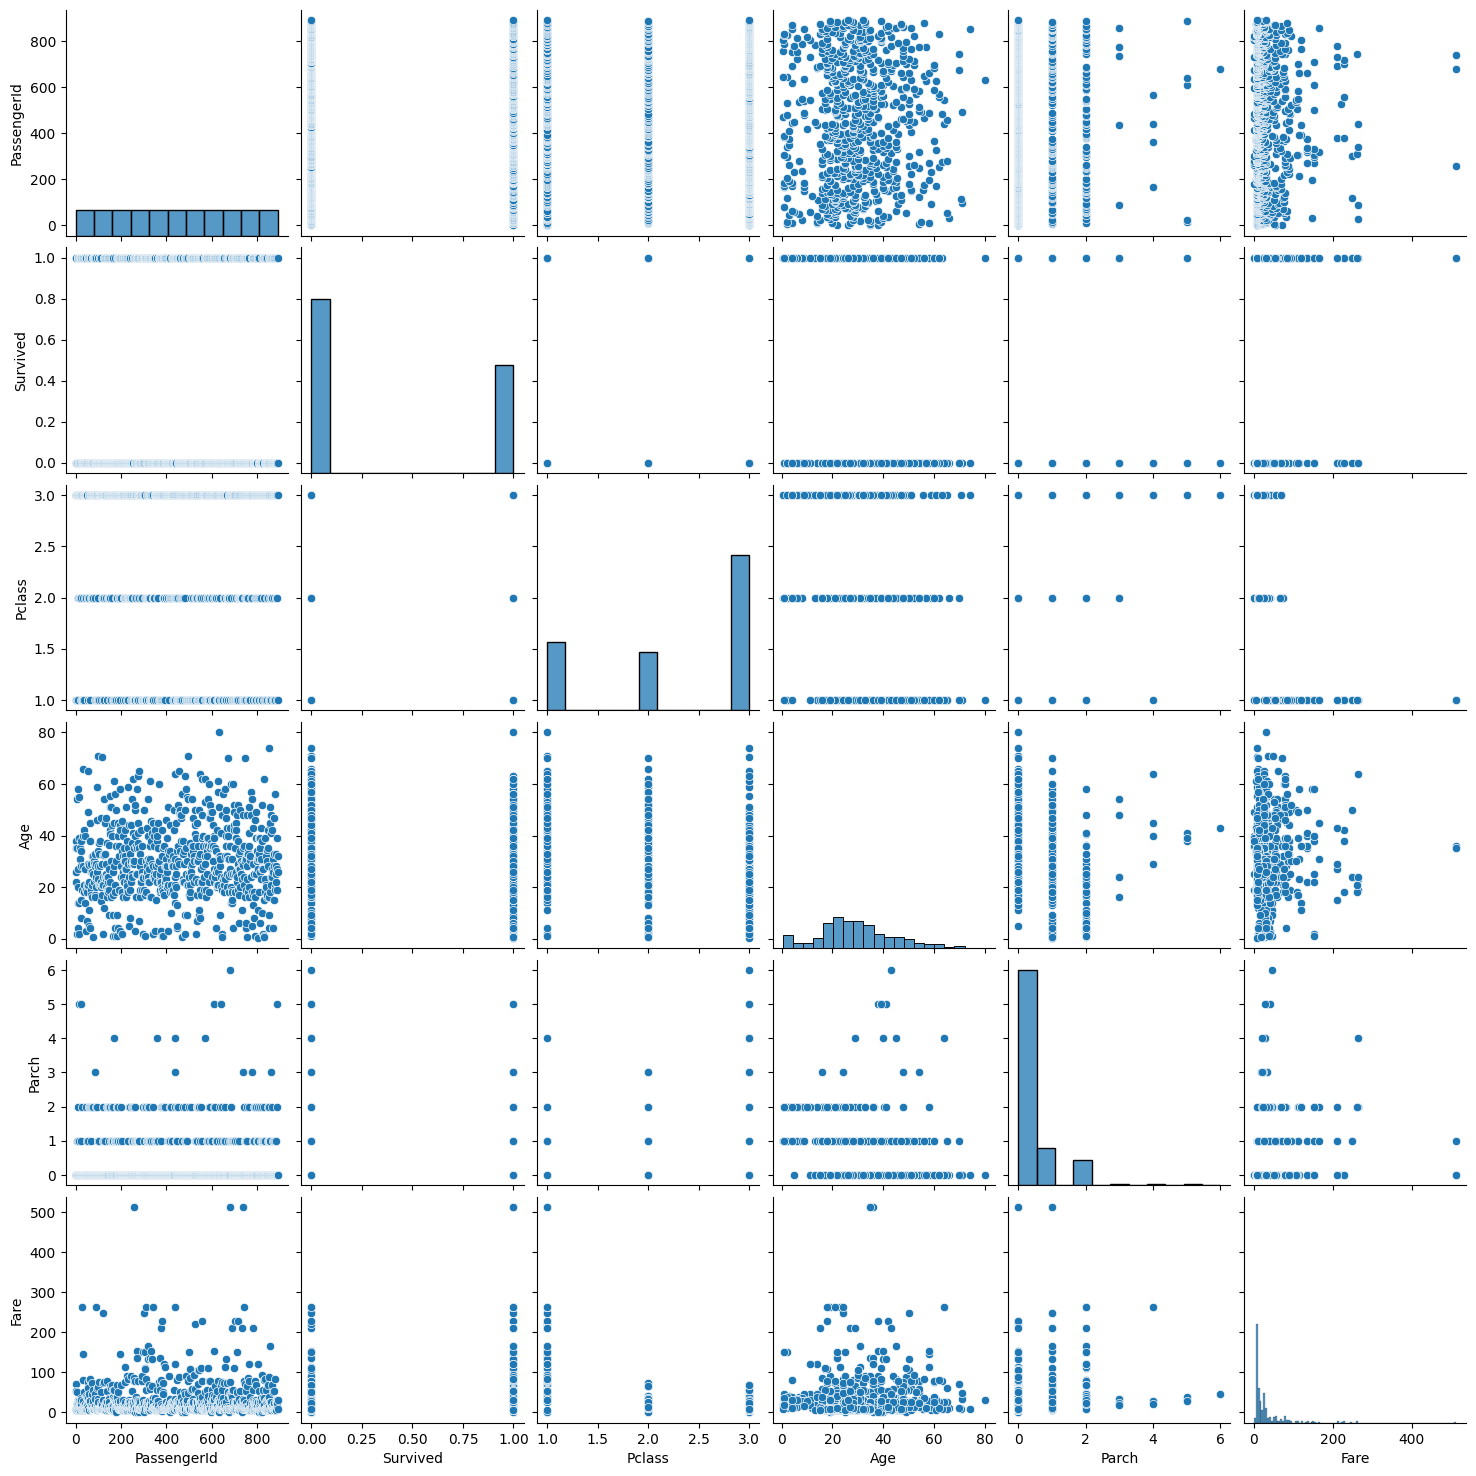

In [8]:
sns.pairplot(df[['PassengerId','Survived','Pclass','Age','Parch','Fare']])

PassengerId: No correlation; can be ignored.

Survived vs Fare: Survivors generally paid higher fares.

Survived vs Pclass: 1st class had higher survival; 3rd class had more non-survivors.

Age vs Survived: No clear trend; some children survived more.

Fare vs Pclass: Strong negative correlation; higher class paid more.

Parch vs Fare: Larger families paid higher fares; most had small family size.

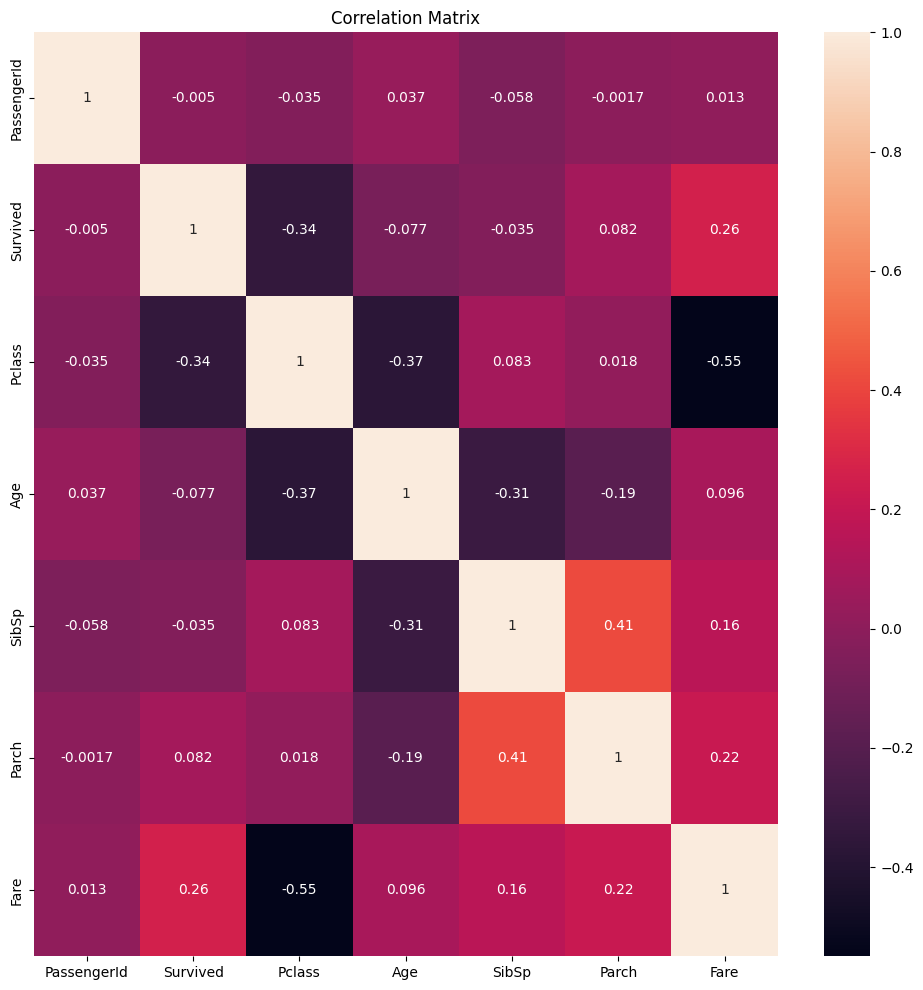

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

The heatmap shows a strong negative correlation between Pclass and Fare, meaning higher-class passengers paid more. Survival correlates moderately with Pclass (−) and Fare (+), suggesting class and fare influenced survival. SibSp and Parch are moderately related, indicating family travel. Age and PassengerId show little correlation, with the latter offering no analytical value. Class and fare are the strongest survival indicators.

In [15]:
survival_by_class=df.groupby('Pclass')['Survived'].mean().reset_index()
print("\nSurvival by Passenger Class:")
print(survival_by_class)


Survival by Passenger Class:
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


Text(0.5, 1.0, 'Survival Rate by Pclass')

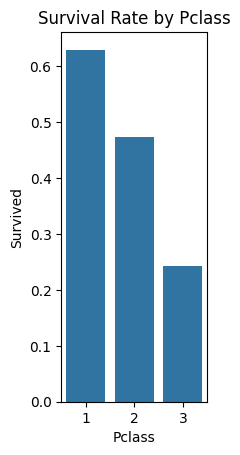

In [25]:
plt.subplot(1,3,1)
sns.barplot(x="Pclass", y="Survived", data=survival_by_class)
plt.title("Survival Rate by Pclass")

1st class passengers had the highest survival rate, followed by 2nd and 3rd class. 3rd class had the lowest chance of survival, indicating class was a strong factor.

In [17]:
survival_by_Sex=df.groupby('Sex')['Survived'].mean().reset_index()
print("\nSurvival by Sex:")
print(survival_by_Sex)


Survival by Sex:
      Sex  Survived
0  female  0.742038
1    male  0.188908


Text(0.5, 1.0, 'Survival Rate by Sex')

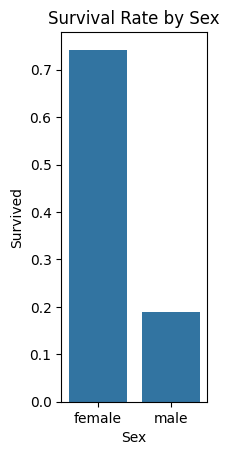

In [26]:
plt.subplot(1,3,2)
sns.barplot(x="Sex", y="Survived", data=survival_by_Sex)
plt.title("Survival Rate by Sex")

Females had a much higher survival rate than males, highlighting a "women and children first" trend in rescue operations.

In [20]:
survival_by_embark=df.groupby('Embarked')['Survived'].mean().reset_index()
print("\n Survival by Embarked:")
print(survival_by_embark)


 Survival by Embarked:
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


Text(0.5, 1.0, 'Survival Rate by Embark')

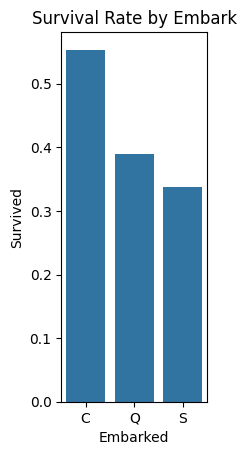

In [28]:
plt.subplot(1,3,3)
sns.barplot(x="Embarked", y="Survived", data=survival_by_embark)
plt.title("Survival Rate by Embark")

Embarked: Passengers from port 'C' (Cherbourg) had the highest survival rate, possibly due to higher-class demographics on those ships.

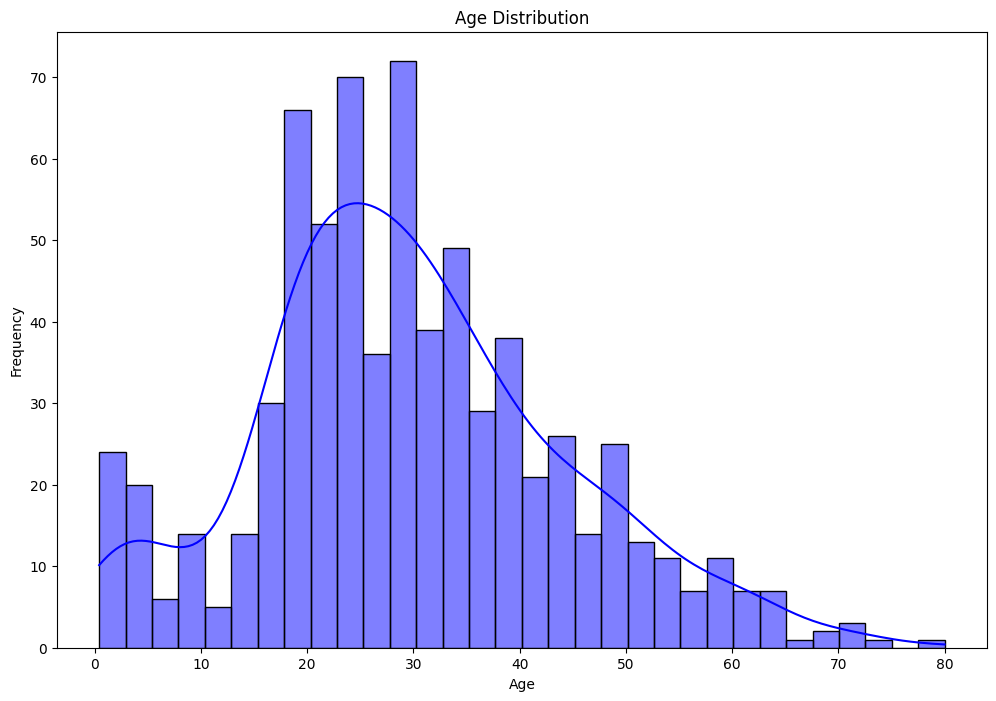

In [32]:
plt.figure(figsize=(12,8))
sns.histplot(df['Age'], bins=32, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

The age distribution is right-skewed, with most passengers between 20 and 40 years old. A peak appears around the mid-20s, while fewer elderly passengers (over 60) are present. Some children under 10 suggest family travel. The KDE curve shows a unimodal shape with a long tail, indicating a  young to middle-aged passenger group.

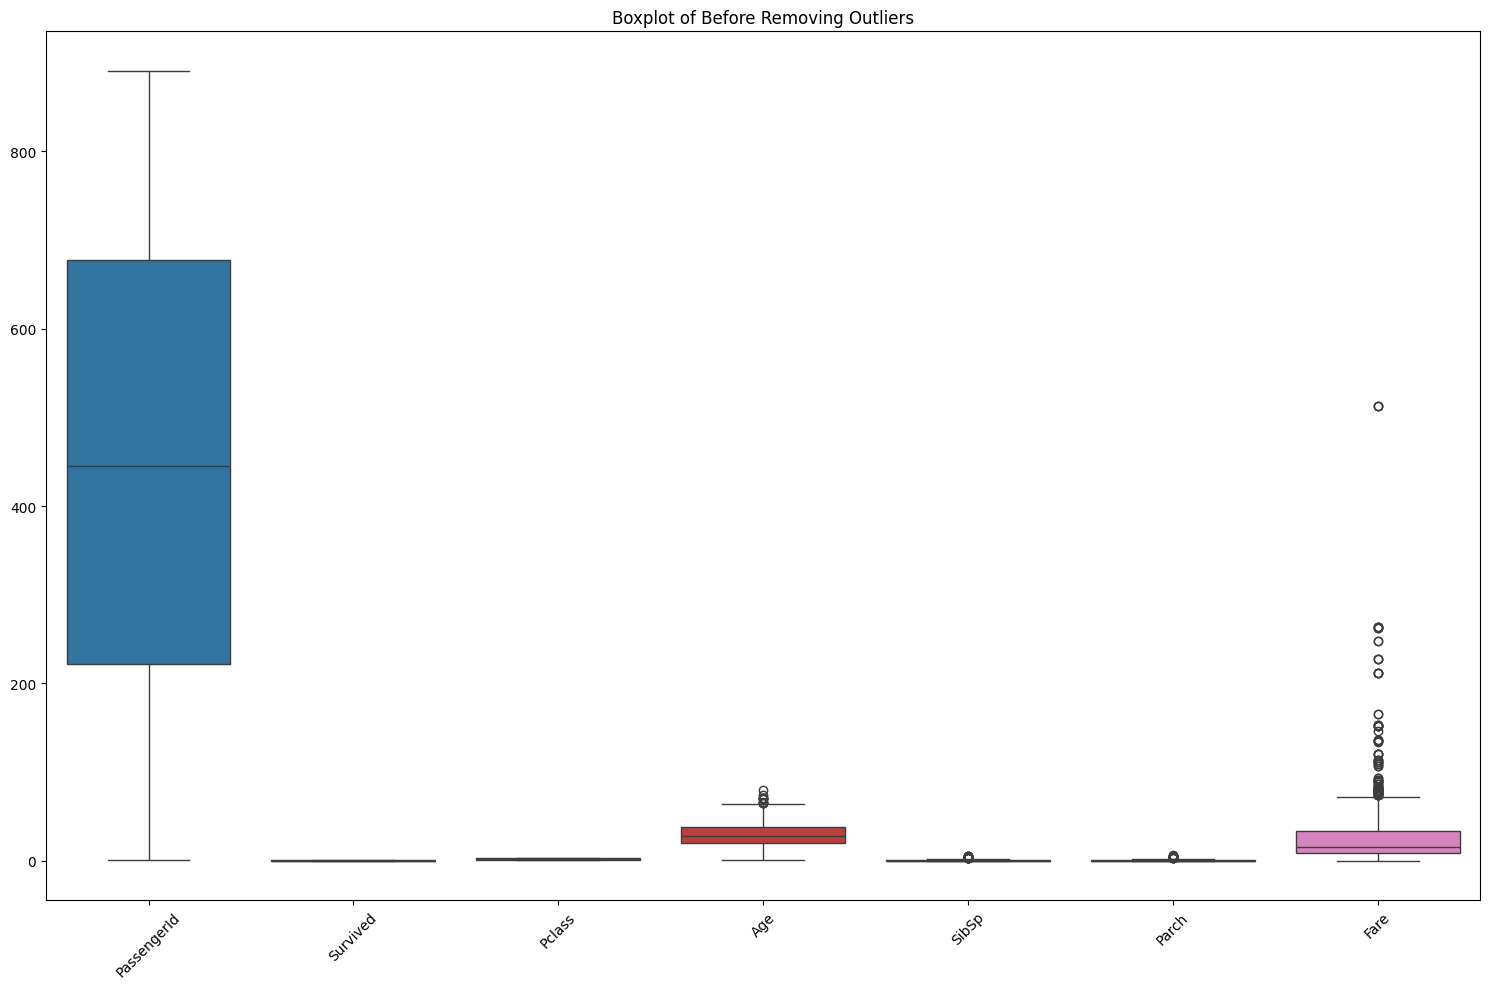

In [35]:
#visualize boxplots for outliers
X = df.select_dtypes(include='number').dropna()
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=X, ax=ax)
ax.set_title("Boxplot of Before Removing Outliers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The boxplot shows outliers in Fare, SibSp, and Parch, with some passengers paying unusually high fares or traveling in large families. Age also shows a few elderly outliers, while Pclass and Survived remain unaffected due to their limited value ranges. This highlights the need for outlier handling or scaling before using the data for modeling.

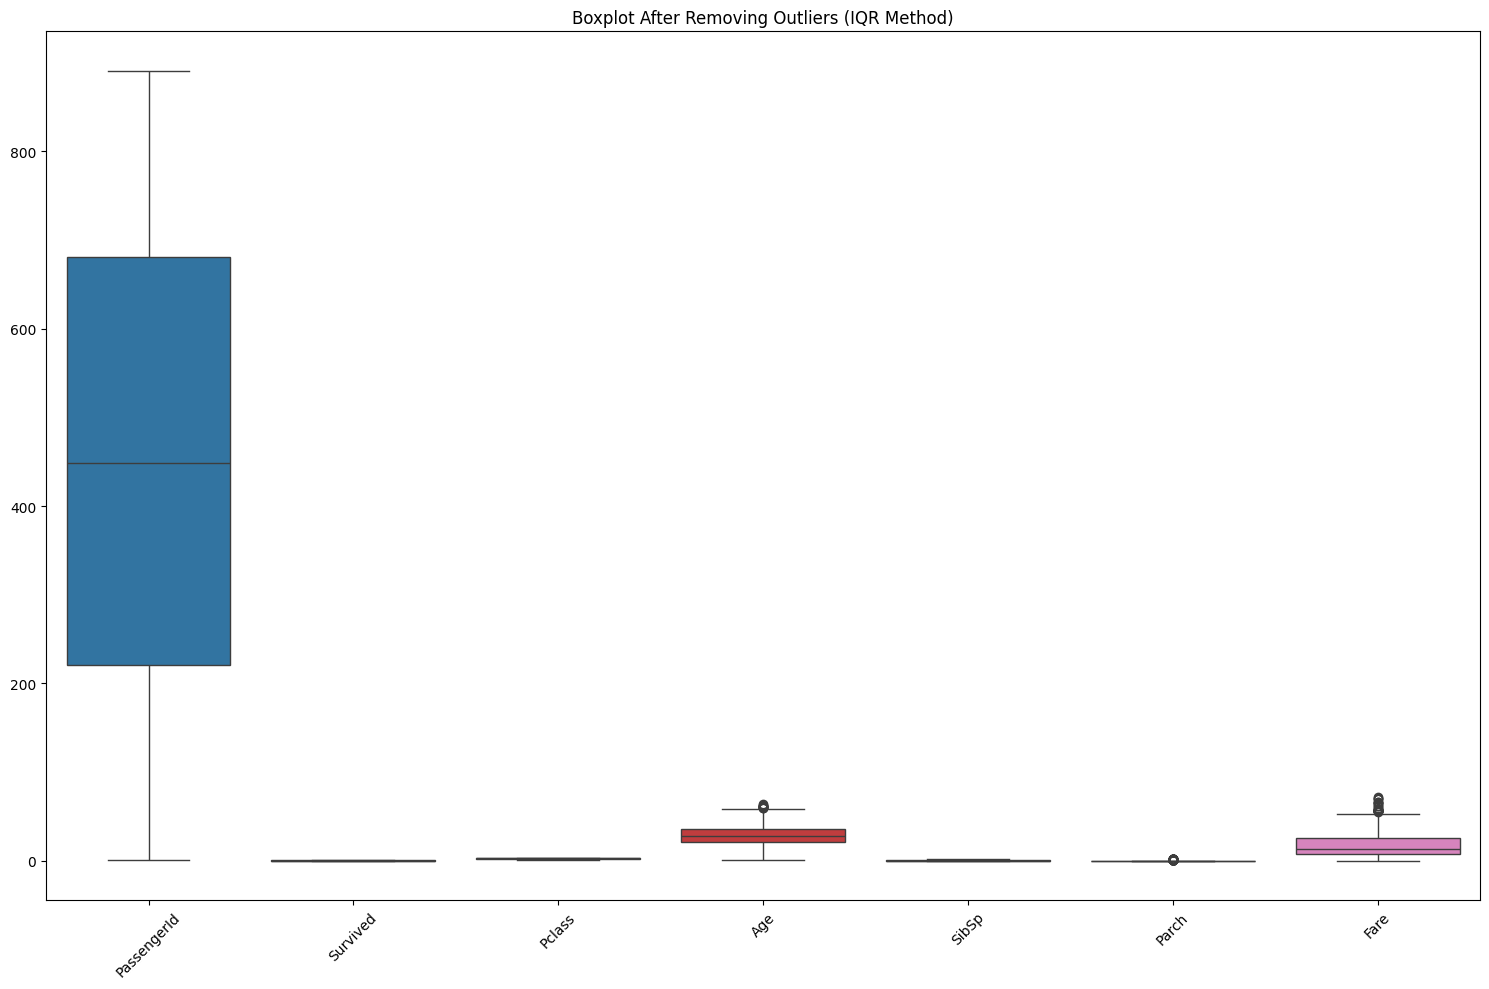

In [36]:
#removing outliers
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
mask = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
X_clean = X[mask]
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=X_clean, ax=ax)
ax.set_title("Boxplot After Removing Outliers (IQR Method)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

After removing outliers using the IQR method, the boxplot shows a more balanced and compact distribution across all numeric features. Extreme values in Fare, SibSp, and Parch have been removed, and Age appears more tightly grouped. This results in a cleaner dataset, reducing the impact of outliers and making it more suitable for modeling.

In [37]:
print("Original shape:", X.shape)
print("After outlier removal:", X_clean.shape)

Original shape: (714, 7)
After outlier removal: (563, 7)


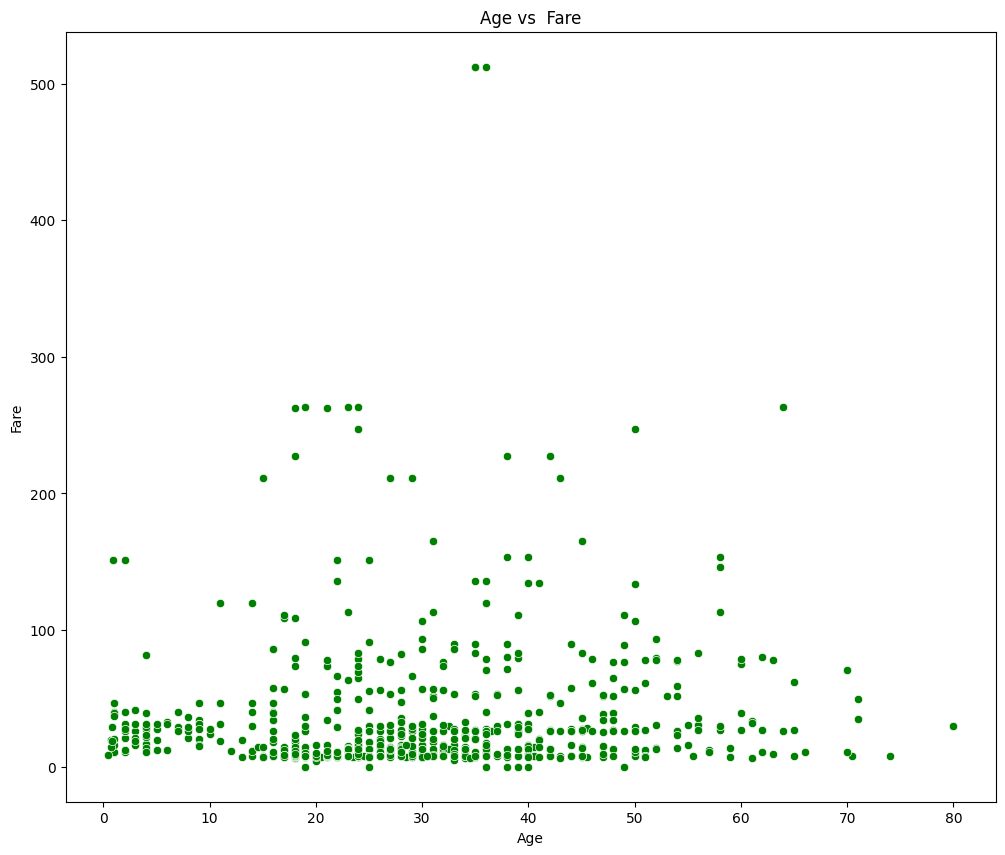

In [40]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x='Age', y='Fare', color='green')
plt.title("Age vs  Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


The scatterplot shows no strong relationship between age and fare. Most passengers, aged 20–40, paid low to moderate fares. A few outliers paid very high fares, regardless of age. Overall, fare appears more influenced by ticket class than age.